# *Docking* molecular com o *PDBbind coreset* 2013

## Table of contents
> [Local optimization scores](https://github.com/caiocrocha/pdbbind-coreset-2013/blob/master/local_opt/Local%20optimization%20scores.ipynb)    
> [RESCORE](https://github.com/caiocrocha/pdbbind-coreset-2013/blob/master/rescore/RESCORE.ipynb)

## Link para o artigo original (PDF)
[A influência dos parâmetros no *docking* com o QuickVina 2](https://github.com/caiocrocha/COVID-19/blob/master/pdbbind-coreset-2013/A%20influência%20dos%20parâmetros%20no%20docking%20com%20o%20QuickVina%202.pdf)

## Justificativa
O *docking* molecular é um método computacional amplamente utilizado na pesquisa por novos medicamentos, que consiste em "atracar" um candidato a fármaco, referido como ligante, na proteína patogênica alvo. Nesse contexto, destacam-se as funções de pontuação, as quais são algoritmos de *docking* que visam quantificar a afinidade de ligação entre esses dois compostos. Com isso, essas funções exploram as possibilidades conformacionais do ligante no sítio de ligação e produzem diferentes poses (conformações) desse ligante, as quais são atribuídas um valor de energia e ordenadas de melhor a pior.

O estudo apresentado nesse notebook refere aos resultados obtidos de experimentos que utilizaram como programa de *docking* o **QuickVina 2**, empregando-se diferentes parâmetros disponíveis em cima do banco de dados **PDBbind coreset** (versão 2016). Os arquivos estruturais das moléculas, arquivos de saída dos programas e arquivos com valores de energia e RMSD podem ser encontrados na pasta [pdbbind-2019.chemflow](https://github.com/caiocrocha/COVID-19/blob/master/pdbbind_v2013_docking/pdbbind-2019.chemflow), enquanto os arquivos originais estão disponíveis na pasta compactada [pdbbind_v2013_core_set.tar.gz](https://github.com/caiocrocha/pdbbind-coreset-2013/blob/master/pdbbind_v2013_core_set.tar.gz).    
Para descompactá-la, use `tar -xzf pdbbind_v2013_core_set.tar.gz`.    
De um total de 195 complexos proteína-ligante e 1770 simulações, são analisadas relações e influência dos parêmetros utilizados na qualidade dos resultados.

## Leitura dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('pdbbind_v2013_docking.csv.gz', compression='gzip')
df.sort_values('RMSD').head()

,Complex,Initial Pose,Pose,Program,Exhaustiveness,Run,Energy,RMSD
6565,3udh,crystal,6,qvina,8,1,-4.8,0.0
6563,3udh,crystal,4,qvina,8,1,-6.0,0.0
6578,3udh,crystal,5,qvina,8,3,-5.7,0.0
6577,3udh,crystal,4,qvina,8,3,-6.0,0.0
6575,3udh,crystal,2,qvina,8,3,-6.9,0.0


In [3]:
print(df.head().to_latex(float_format='%.3f'))

\begin{tabular}{lllrlrrrr}
\toprule
{} & Complex & Initial Pose &  Pose & Program &  Exhaustiveness &  Run &  Energy &  RMSD \\
\midrule
0 &    10gs &      crystal &     1 &   qvina &               8 &    1 &  -7.900 & 2.502 \\
1 &    10gs &      crystal &     2 &   qvina &               8 &    1 &  -7.000 & 1.646 \\
2 &    10gs &      crystal &     3 &   qvina &               8 &    1 &  -6.900 & 4.382 \\
3 &    10gs &      crystal &     4 &   qvina &               8 &    1 &  -6.900 & 4.231 \\
4 &    10gs &      crystal &     5 &   qvina &               8 &    1 &  -6.800 & 3.990 \\
\bottomrule
\end{tabular}



In [4]:
import os

In [5]:
if not os.path.isdir('images'):
    os.mkdir('images')

## Distribuição dos dados

Não há correlação entre a energia e o RMSD

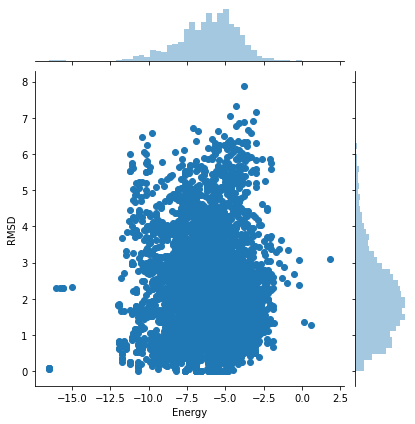

In [6]:
# Gráfico de correlação entre a energia e o RMSD
sns.jointplot(data=df,x='Energy',y='RMSD')

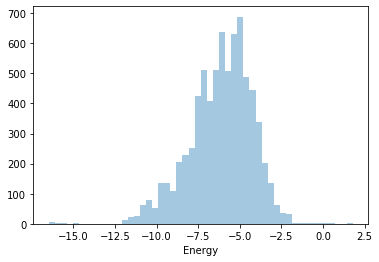

In [7]:
# Histograma da distribuição dos valores de energia
sns.distplot(df['Energy'],kde=False)

Nota-se, pelo histograma abaixo, que o programa produziu um número considerável de poses na faixa aceitével de RMSD, ou seja, RMSD < 2.0 Å.

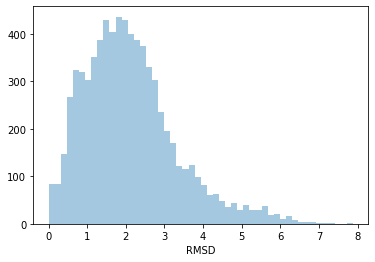

In [8]:
# Histograma da distribuição dos valores de RMSD      
sns.distplot(df['RMSD'],kde=False)

O "gráfico de violino" mostra que a média dos valores de RMSD é aproximadamente 2.0 Å

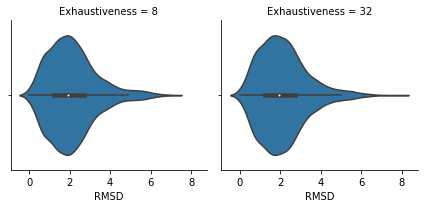

In [9]:
g = sns.FacetGrid(df,col='Exhaustiveness')
g.map(sns.violinplot,'RMSD',order=[8,32])

O gráfico cumulativo mostra a porcentagem de poses com RMSD menor que o valor correspondente de RMSD no eixo x.

Porcentagem de dockings com RMSD abaixo do limite predefinido de 2.0 Ångströms: 51.7563%


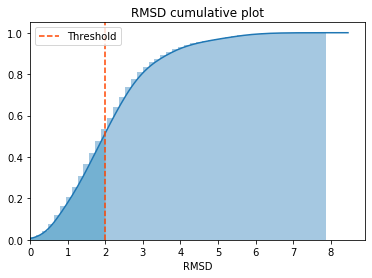

In [10]:
# Gráfico cumulativo do RMSD    

kwargs = {'cumulative': True}
fig, ax = plt.subplots()
sns.distplot(df['RMSD'], hist_kws=kwargs, kde_kws=kwargs)
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=(kde_x < 2) & (kde_x > 0), interpolate=True, color='lightblue')
plt.axvline(x=2, linestyle='--', label='Threshold', color='orangered')
plt.xlim(left=0)
plt.legend()
plt.title('RMSD cumulative plot')
plt.savefig('images/threshold.pdf')
print('Porcentagem de dockings com RMSD abaixo do limite predefinido de 2.0 Ångströms: {:.4f}%'.format(
    df.query('RMSD < 2.0')['RMSD'].count()/len(df['RMSD']) * 100))

## Qualidade

In [11]:
df['Quality']='bad'
df.loc[df['RMSD'] <= 2.5, 'Quality'] = 'medium'
df.loc[df['RMSD'] <= 1.5, 'Quality'] = 'good'

O aumento da exaustividade não influenciou em uma maior qualidade das poses, o que contradiz o resultado esperado, pois se espera que, com o aumento do RMSD, diminuam-se as chances de aparecerem falsos positivos. Já a triplicata dos resultados vai ao encontro do esperado, pois diferentes réplicas dos dockings resultam em diferentes resultados, devido à natureza estocástica das funções de pontuação, com diferentes distribuições das poses em boas, médias e ruins.

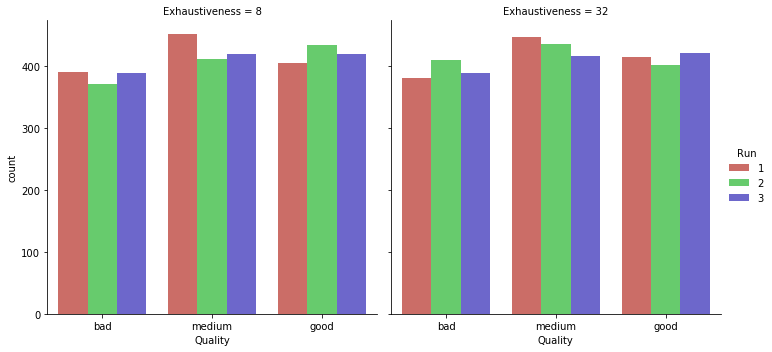

In [12]:
sns.catplot(kind='count',data=df,x='Quality',col='Exhaustiveness',hue='Run',palette='hls')

## Taxas de sucesso

### Taxas de sucesso levando todas as poses em consideração

In [13]:
df['Success'] = False
df.loc[df['RMSD'] < 2.0, 'Success'] = True
df.groupby(['Complex','Program','Exhaustiveness','Run'])['Success'].any()

Complex  Program  Exhaustiveness  Run
10gs     qvina    8               1       True
                                  2      False
                                  3      False
                  32              1      False
                                  2      False
                                         ...  
4tmn     qvina    8               2      False
                                  3       True
                  32              1      False
                                  2       True
                                  3       True
Name: Success, Length: 1170, dtype: bool

In [14]:
success_rates_list = []
for ex in df['Exhaustiveness'].unique():
    success_count = df.query('Exhaustiveness == @ex').groupby(['Complex','Program','Exhaustiveness','Run'])['Success'].any().value_counts()
    success_rate_by_ex = success_count[True]/success_count.sum()
    success_rates_list.append({'Exhaustiveness': ex, 'Success Rate': success_rate_by_ex})
df_success_rates = pd.DataFrame(success_rates_list)
df_success_rates

,Exhaustiveness,Success Rate
0,8,0.834188
1,32,0.834188


In [15]:
print(df_success_rates.to_latex(index=False,float_format='%.3f'))

\begin{tabular}{rr}
\toprule
 Exhaustiveness &  Success Rate \\
\midrule
              8 &         0.834 \\
             32 &         0.834 \\
\bottomrule
\end{tabular}



### Taxas de sucesso por execução

In [16]:
def get_success_by_run(data):
    for i in data['Run'].unique():
        success_by_run = data.query('Run == @i').groupby(['Complex','Program','Exhaustiveness']).any()['Success'].value_counts()
        yield success_by_run[True]/success_by_run.sum()

In [17]:
success_rates_list = []
for ex in df['Exhaustiveness'].unique():
    success_by_run = list(get_success_by_run(df.query('Exhaustiveness == @ex')))
    for i, success_rate in enumerate(success_by_run):
        success_rates_list.append({'Exhaustiveness': ex, 'Run': i+1, 'Success Rate': success_rate})
    overall = sum(success_by_run)/len(success_by_run)   # como o número de amostras é o mesmo para todas as 
                                                        # execuções, a porcentagem de sucesso geral pode ser
                                                        # calcula pela média aritmética simples
    success_rates_list.append({'Exhaustiveness': ex, 'Run': 'Overall', 'Success Rate': overall})
success_rates_by_run = pd.DataFrame(success_rates_list)

In [18]:
success_rates_by_run.pivot_table(values='Success Rate',index='Exhaustiveness',columns='Run').style.set_caption('Success Rate')

Run,1,2,3,Overall
Exhaustiveness,,,,
8,0.841026,0.820513,0.841026,0.834188
32,0.830769,0.810256,0.861538,0.834188


In [19]:
print(success_rates_by_run.set_index(['Exhaustiveness','Run']).to_latex(float_format='%.3f'))

\begin{tabular}{llr}
\toprule
   &         &  Success Rate \\
Exhaustiveness & Run &               \\
\midrule
8  & 1 &         0.841 \\
   & 2 &         0.821 \\
   & 3 &         0.841 \\
   & Overall &         0.834 \\
32 & 1 &         0.831 \\
   & 2 &         0.810 \\
   & 3 &         0.862 \\
   & Overall &         0.834 \\
\bottomrule
\end{tabular}



In [20]:
# Small code to display values on top of each point
def display_values(g):
    for p in g.patches:
        g.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=11, color='gray', xytext=(0, 7.5), textcoords='offset points')

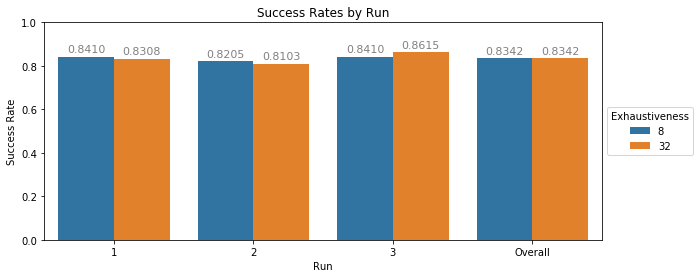

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=success_rates_by_run,x='Run',y='Success Rate',hue='Exhaustiveness',ax=ax)
display_values(g)
plt.legend(title='Exhaustiveness',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylim(0,1)
plt.title('Success Rates by Run')
plt.savefig('images/success_by_run.pdf')

### Taxa de sucesso cumulativa

In [22]:
def get_success_by_pose(data, nposes):
    for i in range(1, nposes+1):
        success_by_pose = data.sort_values('Pose').groupby(['Complex','Program','Exhaustiveness','Run']).head(i).groupby(['Complex','Program','Exhaustiveness','Run'])['Success'].any().value_counts()
        yield success_by_pose[True]/success_by_pose.sum()

In [23]:
success_rates_list = []
for ex in df['Exhaustiveness'].unique():
    for i, success_rate in enumerate(get_success_by_pose(df.query('Exhaustiveness == @ex'), 10)):
        success_rates_list.append({'Exhaustiveness': ex, 'Number of Poses': i+1, 'Success Rate': success_rate})
success_rates_by_pose = pd.DataFrame(success_rates_list)

In [24]:
success_rates_by_pose.pivot_table(values='Success Rate',index='Exhaustiveness',columns='Number of Poses').style.set_caption('Success Rate')

Number of Poses,1,2,3,4,5,6,7,8,9,10
Exhaustiveness,,,,,,,,,,
8,0.699145,0.765812,0.786325,0.801709,0.808547,0.815385,0.822222,0.829060,0.834188,0.834188
32,0.707692,0.782906,0.796581,0.810256,0.815385,0.820513,0.829060,0.832479,0.834188,0.834188


Observa-se que a taxa de sucesso aumenta quando são consideradas mais poses dentre os resultados, pois maior é a probabilidade de haver pelo menos uma pose com RMSD < 2.0 dentro de cada grupo de docking.

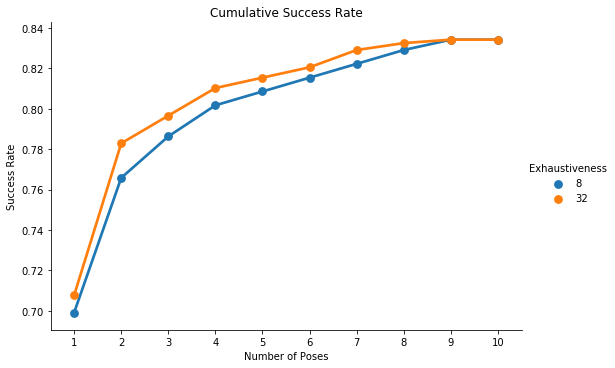

In [25]:
sns.catplot(data=success_rates_by_pose,x='Number of Poses',y='Success Rate',hue='Exhaustiveness',kind='point',height=5,aspect=1.5)
plt.title('Cumulative Success Rate')
plt.savefig('images/cumulative-success-rate.pdf')

In [26]:
# Taxa de sucesso levando as três primeiras poses em consideração
print(success_rates_by_pose.groupby('Exhaustiveness').head(3).set_index(['Exhaustiveness','Number of Poses']).to_latex(float_format='%.3f'))

\begin{tabular}{llr}
\toprule
   &   &  Success Rate \\
Exhaustiveness & Number of Poses &               \\
\midrule
8  & 1 &         0.699 \\
   & 2 &         0.766 \\
   & 3 &         0.786 \\
32 & 1 &         0.708 \\
   & 2 &         0.783 \\
   & 3 &         0.797 \\
\bottomrule
\end{tabular}



## Curva ROC

* Verdadeiros positivos (TP)
* Falsos positivos (FP)
* Verdadeiros negativos (TN)
* Falsos negativos (FN)
#### Para desenhar a curva ROC, utilizaram-se as seguintes métricas:

In [27]:
df_classes = pd.DataFrame([{'Classification': 'TP', 'Pose': '[1, 2, 3]', 'RMSD': '< 2.0'}, 
             {'Classification': 'FP', 'Pose': '[1, 2, 3]', 'RMSD': '>= 2.0'},
             {'Classification': 'TN', 'Pose': '> 3', 'RMSD': '< 2.0'},
             {'Classification': 'FN', 'Pose': '> 3', 'RMSD': '>= 2.0'}]).set_index('Classification').T
df_classes

Classification,TP,FP,TN,FN
Pose,"[1, 2, 3]","[1, 2, 3]",> 3,> 3
RMSD,< 2.0,>= 2.0,< 2.0,>= 2.0


In [28]:
df_classes.loc['Pose'] = df_classes.loc['Pose'].apply(lambda x: f'${x}$') # add math notation to LaTeX
df_classes.loc['RMSD'] = df_classes.loc['RMSD'].apply(lambda x: f'${x}$') # add math notation to LaTeX

In [29]:
print(df_classes.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
Classification &           TP &           FP &       TN &        FN \\
\midrule
Pose &  $[1, 2, 3]$ &  $[1, 2, 3]$ &    $> 3$ &     $> 3$ \\
RMSD &      $< 2.0$ &     $>= 2.0$ &  $< 2.0$ &  $>= 2.0$ \\
\bottomrule
\end{tabular}



In [30]:
from sklearn.metrics import roc_curve, auc

In [31]:
def ROC_rates(df):
    fpr, tpr, thresholds = roc_curve(y_true=df['Success'].to_numpy(), y_score=df['Energy'].to_numpy())
    return fpr, tpr, thresholds

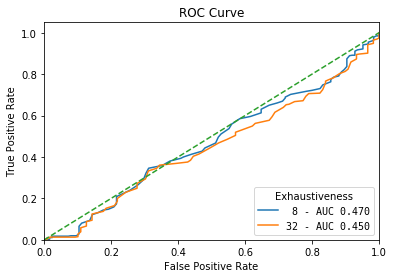

In [32]:
auc_list = []
fig, ax = plt.subplots()
for i in df['Exhaustiveness'].unique():
    df_best = df.query('Exhaustiveness == @i and Pose <= 3').groupby(['Complex','Initial Pose','Program','Run']
                ).apply(lambda x: x.sort_values('RMSD').head(1)).reset_index(drop=True) # manter melhor pose 
                                                                                        # (menor RMSD) 
                                                                                        # das três primeiras 
                                                                                        # poses em cada grupo
    fpr, tpr, thresholds = ROC_rates(df_best)
    auc_i = auc(fpr, tpr)
    auc_list.append({'Exhaustiveness': i, 'AUC': auc_i})
    ax.plot(fpr, tpr, label=f'{int(i):>2d} - AUC {auc_i:>.3f}')
ax.plot([0,1], [0,1], linestyle='--')
ax.set(xlim=[0.0,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')
plt.legend(title='Exhaustiveness', loc='lower right', prop={'family': 'monospace'})
plt.savefig('images/roc-curve.pdf')

In [33]:
df_auc = pd.DataFrame(auc_list)
df_auc

,Exhaustiveness,AUC
0,8,0.469826
1,32,0.449796


Apesar das taxas de sucesso elevadas, a curva ROC/AUC mostram que a função de pontuação não conseguiu discriminar entre resultados positivos e negativos.

In [34]:
print(df_auc.to_latex(index=False, float_format='%.3f'))

\begin{tabular}{rr}
\toprule
 Exhaustiveness &   AUC \\
\midrule
              8 & 0.470 \\
             32 & 0.450 \\
\bottomrule
\end{tabular}



## Informações suplementares

### Taxa de sucesso cumulativa separada por exaustividade e execução

In [35]:
success_rates_list = []
for ex in df['Exhaustiveness'].unique():
    for run in df['Run'].unique():
        for i, success_rate in enumerate(get_success_by_pose(df.query('Exhaustiveness == @ex and Run == @run'), 10)):
            success_rates_list.append({'Exhaustiveness': ex, 'Run': run, 'Number of Poses': i+1, 'Success Rate': success_rate})
success_rates_data = pd.DataFrame(success_rates_list)

In [36]:
success_rates_data.pivot_table(values='Success Rate',index=['Exhaustiveness','Run'],columns='Number of Poses').style.set_caption('Success Rate')